# Importation de données 

In [1]:
import pandas as pd
data = pd.read_excel('bank.xlsx')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [3]:
#importer les bibliothèques
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Dropout
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Preprocessing

In [4]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [5]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

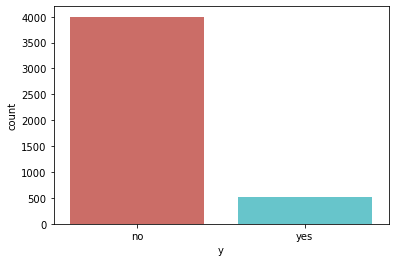

In [7]:
data['y'].value_counts()
sns.countplot(x="y", data=data, palette='hls')
plt.show()

Ici, notre base est désiquilibré.
On va utiliser  la technique SMOTE.

In [8]:
#Label Encoding

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)


In [9]:
data = MultiColumnLabelEncoder(columns = ['job','marital','education', 'default','housing','loan','contact','month','poutcome','y']).fit_transform(data)

## SMOTE

In [11]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [12]:
from imblearn.over_sampling import SMOTE

# for reproducibility purposes
seed = 100


# make a new df made of all the columns, except the target class
X = data.loc[:, data.columns != 'y']
y = data['y']
sm = SMOTE(sampling_strategy='auto',  random_state=seed)
X_res, y_res = sm.fit_resample(X, y)


data= pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res)], axis=1)

In [13]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,32,7,0,2,0,680,1,0,0,6,2,587,2,-1,0,3,1
7996,46,6,1,1,0,35,0,0,0,10,4,482,1,220,7,2,1
7997,52,7,1,1,0,892,0,0,0,7,8,355,1,-1,0,3,1
7998,23,8,2,1,0,2500,0,0,0,26,5,256,4,172,3,2,1


In [15]:
# features
X = data.drop('y', axis=1)
print(X)

# target
y=data['y']
print(y)

      age  job  marital  education  default  balance  housing  loan  contact  \
0      30   10        1          0        0     1787        0     0        0   
1      33    7        1          1        0     4789        1     1        0   
2      35    4        2          2        0     1350        1     0        0   
3      30    4        1          2        0     1476        1     1        2   
4      59    1        1          1        0        0        1     0        2   
...   ...  ...      ...        ...      ...      ...      ...   ...      ...   
7995   32    7        0          2        0      680        1     0        0   
7996   46    6        1          1        0       35        0     0        0   
7997   52    7        1          1        0      892        0     0        0   
7998   23    8        2          1        0     2500        0     0        0   
7999   36    5        1          1        0      131        1     0        1   

      day  month  duration  campaign  p

# Regression logistique

In [18]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(scaled_X, Y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.85


# Gridsearch

In [19]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model

from sklearn.model_selection import GridSearchCV

In [20]:
#Seting the Hyper Parameters
clf_params = {
    #'classifier'   : LogisticRegression(),
    'penalty'      : ['l1','l2','elasticnet'],
    'C'            : [0.001, 0.005, 0.01, 0.25, 0.5, 0.75, 0.9, 1, 1.01, 1.05, 1.1, 1.15, 1.2],
    'solver'       : ['lbfgs'],
    'fit_intercept': [True, False]
}

#Creating the classifier
model = LogisticRegression(random_state=2)

grid_search = GridSearchCV(model, param_grid=clf_params, cv=5, scoring='accuracy', verbose=4)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 78 candidates, totalling 390 fits
[CV 1/5] END C=0.001, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, fit_intercept=True, penalty=l2, solver=lbfgs;, score=0.839 total time=   0.0s
[CV 2/5] END C=0.001, fit_intercept=True, penalty=l2, solver=lbfgs;, score=0.824 total time=   0.0s
[CV 3/5] END C=0.001, fit_intercept=True, penalty=l2, solver=lbfgs;, score=0.831 total time=   0.0s


C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_v

[CV 4/5] END C=0.001, fit_intercept=True, penalty=l2, solver=lbfgs;, score=0.838 total time=   0.0s
[CV 5/5] END C=0.001, fit_intercept=True, penalty=l2, solver=lbfgs;, score=0.859 total time=   0.0s
[CV 1/5] END C=0.001, fit_intercept=True, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, fit_intercept=True, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, fit_intercept=True, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, fit_intercept=True, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, fit_intercept=True, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, fit_intercept=False, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, fit_intercept=False, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, fit_intercept=False, penalty=l1, solver=lbfgs;, sc

C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_sele

[CV 3/5] END C=0.005, fit_intercept=True, penalty=l2, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 4/5] END C=0.005, fit_intercept=True, penalty=l2, solver=lbfgs;, score=0.851 total time=   0.0s
[CV 5/5] END C=0.005, fit_intercept=True, penalty=l2, solver=lbfgs;, score=0.857 total time=   0.0s
[CV 1/5] END C=0.005, fit_intercept=True, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.005, fit_intercept=True, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.005, fit_intercept=True, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.005, fit_intercept=True, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.005, fit_intercept=True, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.005, fit_intercept=False, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.005, fit_intercept=False, penalty=l1, solver=lbfgs;, s

C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_sele

[CV 1/5] END C=0.01, fit_intercept=True, penalty=l2, solver=lbfgs;, score=0.842 total time=   0.0s
[CV 2/5] END C=0.01, fit_intercept=True, penalty=l2, solver=lbfgs;, score=0.821 total time=   0.0s
[CV 3/5] END C=0.01, fit_intercept=True, penalty=l2, solver=lbfgs;, score=0.834 total time=   0.0s
[CV 4/5] END C=0.01, fit_intercept=True, penalty=l2, solver=lbfgs;, score=0.846 total time=   0.0s
[CV 5/5] END C=0.01, fit_intercept=True, penalty=l2, solver=lbfgs;, score=0.855 total time=   0.0s
[CV 1/5] END C=0.01, fit_intercept=True, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, fit_intercept=True, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, fit_intercept=True, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, fit_intercept=True, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, fit_intercept=True, penalty=elasticnet, solver=lbfgs;, score=nan

C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_sele

[CV 2/5] END C=0.01, fit_intercept=False, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, fit_intercept=False, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, fit_intercept=False, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, fit_intercept=False, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.25, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.25, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.25, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.25, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.25, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.25, fit_intercept=True, penalty=l2, solver=lbfgs;, score=0.844 total time=

C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_sele

[CV 1/5] END C=0.5, fit_intercept=True, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.5, fit_intercept=True, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.5, fit_intercept=True, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.5, fit_intercept=True, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.5, fit_intercept=True, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.5, fit_intercept=False, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.5, fit_intercept=False, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.5, fit_intercept=False, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.5, fit_intercept=False, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.5, fit_intercept=False, penalty=l1, solver=lbfgs;, score=nan total time=   

C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_sele

[CV 3/5] END C=0.75, fit_intercept=True, penalty=l2, solver=lbfgs;, score=0.842 total time=   0.0s
[CV 4/5] END C=0.75, fit_intercept=True, penalty=l2, solver=lbfgs;, score=0.845 total time=   0.0s
[CV 5/5] END C=0.75, fit_intercept=True, penalty=l2, solver=lbfgs;, score=0.857 total time=   0.0s
[CV 1/5] END C=0.75, fit_intercept=True, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.75, fit_intercept=True, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.75, fit_intercept=True, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.75, fit_intercept=True, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.75, fit_intercept=True, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.75, fit_intercept=False, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.75, fit_intercept=False, penalty=l1, solver=lbfgs;, score=nan t

C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_sele

[CV 5/5] END C=0.75, fit_intercept=False, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.9, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.9, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.9, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.9, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.9, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.9, fit_intercept=True, penalty=l2, solver=lbfgs;, score=0.842 total time=   0.0s
[CV 2/5] END C=0.9, fit_intercept=True, penalty=l2, solver=lbfgs;, score=0.809 total time=   0.0s
[CV 3/5] END C=0.9, fit_intercept=True, penalty=l2, solver=lbfgs;, score=0.842 total time=   0.0s
[CV 4/5] END C=0.9, fit_intercept=True, penalty=l2, solver=lbfgs;, score=0.845 total time=   0.0s
[CV 5/5] END C=0.9, fi

C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_sele


[CV 1/5] END C=1, fit_intercept=True, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, fit_intercept=True, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, fit_intercept=True, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1, fit_intercept=True, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=1, fit_intercept=True, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=1, fit_intercept=False, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, fit_intercept=False, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, fit_intercept=False, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1, fit_intercept=False, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=1, fit_intercept=False, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C

C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_sele

[CV 2/5] END C=1.01, fit_intercept=True, penalty=l2, solver=lbfgs;, score=0.809 total time=   0.0s
[CV 3/5] END C=1.01, fit_intercept=True, penalty=l2, solver=lbfgs;, score=0.842 total time=   0.0s
[CV 4/5] END C=1.01, fit_intercept=True, penalty=l2, solver=lbfgs;, score=0.845 total time=   0.0s
[CV 5/5] END C=1.01, fit_intercept=True, penalty=l2, solver=lbfgs;, score=0.857 total time=   0.0s
[CV 1/5] END C=1.01, fit_intercept=True, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1.01, fit_intercept=True, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1.01, fit_intercept=True, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1.01, fit_intercept=True, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=1.01, fit_intercept=True, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=1.01, fit_intercept=False, penalty=l1, solver=lbfgs;, score=nan 

C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_sele

[CV 2/5] END C=1.05, fit_intercept=False, penalty=l2, solver=lbfgs;, score=0.820 total time=   0.0s
[CV 3/5] END C=1.05, fit_intercept=False, penalty=l2, solver=lbfgs;, score=0.840 total time=   0.0s
[CV 4/5] END C=1.05, fit_intercept=False, penalty=l2, solver=lbfgs;, score=0.845 total time=   0.0s
[CV 5/5] END C=1.05, fit_intercept=False, penalty=l2, solver=lbfgs;, score=0.862 total time=   0.0s
[CV 1/5] END C=1.05, fit_intercept=False, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1.05, fit_intercept=False, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1.05, fit_intercept=False, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1.05, fit_intercept=False, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=1.05, fit_intercept=False, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=1.1, fit_intercept=True, penalty=l1, solver=lbfgs;, sco

C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_sele

[CV 1/5] END C=1.1, fit_intercept=False, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1.1, fit_intercept=False, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1.1, fit_intercept=False, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1.1, fit_intercept=False, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=1.1, fit_intercept=False, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=1.1, fit_intercept=False, penalty=l2, solver=lbfgs;, score=0.841 total time=   0.0s
[CV 2/5] END C=1.1, fit_intercept=False, penalty=l2, solver=lbfgs;, score=0.820 total time=   0.0s
[CV 3/5] END C=1.1, fit_intercept=False, penalty=l2, solver=lbfgs;, score=0.840 total time=   0.0s
[CV 4/5] END C=1.1, fit_intercept=False, penalty=l2, solver=lbfgs;, score=0.845 total time=   0.0s
[CV 5/5] END C=1.1, fit_intercept=False, penalty=l2, solver=lbfgs;, score=0.862 total time=   0.0s
[CV 1/5] END C=1.1, 

C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_sele

[CV 4/5] END C=1.15, fit_intercept=True, penalty=l2, solver=lbfgs;, score=0.845 total time=   0.0s
[CV 5/5] END C=1.15, fit_intercept=True, penalty=l2, solver=lbfgs;, score=0.857 total time=   0.0s
[CV 1/5] END C=1.15, fit_intercept=True, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1.15, fit_intercept=True, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1.15, fit_intercept=True, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1.15, fit_intercept=True, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=1.15, fit_intercept=True, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=1.15, fit_intercept=False, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1.15, fit_intercept=False, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1.15, fit_intercept=False, penalty=l1, solver=lbfgs;, score=nan to

C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_sele

[CV 2/5] END C=1.2, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1.2, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1.2, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=1.2, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=1.2, fit_intercept=True, penalty=l2, solver=lbfgs;, score=0.842 total time=   0.0s
[CV 2/5] END C=1.2, fit_intercept=True, penalty=l2, solver=lbfgs;, score=0.809 total time=   0.0s
[CV 3/5] END C=1.2, fit_intercept=True, penalty=l2, solver=lbfgs;, score=0.842 total time=   0.0s
[CV 4/5] END C=1.2, fit_intercept=True, penalty=l2, solver=lbfgs;, score=0.845 total time=   0.0s
[CV 5/5] END C=1.2, fit_intercept=True, penalty=l2, solver=lbfgs;, score=0.857 total time=   0.0s
[CV 1/5] END C=1.2, fit_intercept=True, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1.2, fi

C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_sele

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=2),
             param_grid={'C': [0.001, 0.005, 0.01, 0.25, 0.5, 0.75, 0.9, 1,
                               1.01, 1.05, 1.1, 1.15, 1.2],
                         'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs']},
             scoring='accuracy', verbose=4)

In [21]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.8421428571428571
{'C': 0.005, 'fit_intercept': False, 'penalty': 'l2', 'solver': 'lbfgs'}


In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 993  199]
 [ 166 1042]]


In [23]:
#CLASSIFICATION REPORT
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1192
           1       0.84      0.86      0.85      1208

    accuracy                           0.85      2400
   macro avg       0.85      0.85      0.85      2400
weighted avg       0.85      0.85      0.85      2400



# Modèles: KNN, Decision Tree, Random Forest, SVM

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

In [25]:
seed = 7

# prepare models
models = []

models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state=42)))
models.append(('RF', RandomForestClassifier(random_state=42)))
models.append(('SVM', SVC(random_state=42)))


# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

for name, model in models:
        kfold = KFold(n_splits=5)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

KNN: 0.886071 (0.007354)
CART: 0.891607 (0.011731)
RF: 0.935536 (0.006040)
SVM: 0.892143 (0.015582)


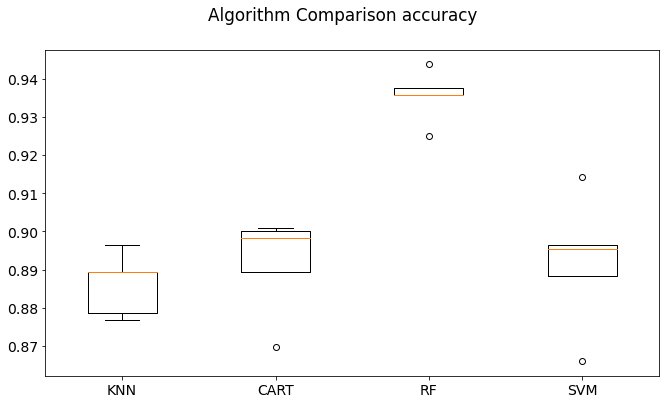

In [26]:
# boxplot algorithm comparison
fig = plt.figure(figsize=(11,6))
fig.suptitle('Algorithm Comparison accuracy')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Random Forest

In [27]:
#Seting the Hyper Parameters
param_grid = {"max_depth": [3,5, 7, 10,None],
              "n_estimators":[3,5,10,25,50,150],
              "max_features": [4,7,15,20]}

#Creating the classifier
model = RandomForestClassifier(random_state=2)

grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=4)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5] END max_depth=3, max_features=4, n_estimators=3;, score=0.801 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=4, n_estimators=3;, score=0.790 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=4, n_estimators=3;, score=0.822 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=4, n_estimators=3;, score=0.817 total time=   0.1s
[CV 5/5] END max_depth=3, max_features=4, n_estimators=3;, score=0.838 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=4, n_estimators=5;, score=0.821 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=4, n_estimators=5;, score=0.823 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=4, n_estimators=5;, score=0.818 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=4, n_estimators=5;, score=0.813 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=4, n_estimators=5;, score=0.845 total time=   0.0s
[CV 1/5] END max_depth=3, max_feature

C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 2/5] END max_depth=3, max_features=20, n_estimators=10;, score=nan total time=   0.0s
[CV 3/5] END max_depth=3, max_features=20, n_estimators=10;, score=nan total time=   0.0s
[CV 4/5] END max_depth=3, max_features=20, n_estimators=10;, score=nan total time=   0.0s
[CV 5/5] END max_depth=3, max_features=20, n_estimators=10;, score=nan total time=   0.0s
[CV 1/5] END max_depth=3, max_features=20, n_estimators=25;, score=nan total time=   0.0s
[CV 2/5] END max_depth=3, max_features=20, n_estimators=25;, score=nan total time=   0.0s
[CV 3/5] END max_depth=3, max_features=20, n_estimators=25;, score=nan total time=   0.0s


C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 4/5] END max_depth=3, max_features=20, n_estimators=25;, score=nan total time=   0.0s
[CV 5/5] END max_depth=3, max_features=20, n_estimators=25;, score=nan total time=   0.0s
[CV 1/5] END max_depth=3, max_features=20, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5] END max_depth=3, max_features=20, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END max_depth=3, max_features=20, n_estimators=50;, score=nan total time=   0.0s


C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 4/5] END max_depth=3, max_features=20, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END max_depth=3, max_features=20, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5] END max_depth=3, max_features=20, n_estimators=150;, score=nan total time=   0.0s


C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 2/5] END max_depth=3, max_features=20, n_estimators=150;, score=nan total time=   0.0s
[CV 3/5] END max_depth=3, max_features=20, n_estimators=150;, score=nan total time=   0.0s


C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 4/5] END max_depth=3, max_features=20, n_estimators=150;, score=nan total time=   0.0s
[CV 5/5] END max_depth=3, max_features=20, n_estimators=150;, score=nan total time=   0.0s
[CV 1/5] END max_depth=5, max_features=4, n_estimators=3;, score=0.836 total time=   0.0s
[CV 2/5] END max_depth=5, max_features=4, n_estimators=3;, score=0.830 total time=   0.0s
[CV 3/5] END max_depth=5, max_features=4, n_estimators=3;, score=0.846 total time=   0.0s
[CV 4/5] END max_depth=5, max_features=4, n_estimators=3;, score=0.847 total time=   0.0s


C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 5/5] END max_depth=5, max_features=4, n_estimators=3;, score=0.885 total time=   0.0s
[CV 1/5] END max_depth=5, max_features=4, n_estimators=5;, score=0.849 total time=   0.0s
[CV 2/5] END max_depth=5, max_features=4, n_estimators=5;, score=0.846 total time=   0.0s
[CV 3/5] END max_depth=5, max_features=4, n_estimators=5;, score=0.854 total time=   0.0s
[CV 4/5] END max_depth=5, max_features=4, n_estimators=5;, score=0.865 total time=   0.0s
[CV 5/5] END max_depth=5, max_features=4, n_estimators=5;, score=0.879 total time=   0.0s
[CV 1/5] END max_depth=5, max_features=4, n_estimators=10;, score=0.856 total time=   0.0s
[CV 2/5] END max_depth=5, max_features=4, n_estimators=10;, score=0.850 total time=   0.0s
[CV 3/5] END max_depth=5, max_features=4, n_estimators=10;, score=0.862 total time=   0.0s
[CV 4/5] END max_depth=5, max_features=4, n_estimators=10;, score=0.863 total time=   0.0s
[CV 5/5] END max_depth=5, max_features=4, n_estimators=10;, score=0.882 total time=   0.0s
[CV 1

C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 1/5] END max_depth=5, max_features=20, n_estimators=25;, score=nan total time=   0.0s
[CV 2/5] END max_depth=5, max_features=20, n_estimators=25;, score=nan total time=   0.0s
[CV 3/5] END max_depth=5, max_features=20, n_estimators=25;, score=nan total time=   0.0s
[CV 4/5] END max_depth=5, max_features=20, n_estimators=25;, score=nan total time=   0.0s
[CV 5/5] END max_depth=5, max_features=20, n_estimators=25;, score=nan total time=   0.0s
[CV 1/5] END max_depth=5, max_features=20, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5] END max_depth=5, max_features=20, n_estimators=50;, score=nan total time=   0.0s


C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 3/5] END max_depth=5, max_features=20, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END max_depth=5, max_features=20, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END max_depth=5, max_features=20, n_estimators=50;, score=nan total time=   0.0s


C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 1/5] END max_depth=5, max_features=20, n_estimators=150;, score=nan total time=   0.0s
[CV 2/5] END max_depth=5, max_features=20, n_estimators=150;, score=nan total time=   0.0s


C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 3/5] END max_depth=5, max_features=20, n_estimators=150;, score=nan total time=   0.0s
[CV 4/5] END max_depth=5, max_features=20, n_estimators=150;, score=nan total time=   0.0s


C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 5/5] END max_depth=5, max_features=20, n_estimators=150;, score=nan total time=   0.0s
[CV 1/5] END max_depth=7, max_features=4, n_estimators=3;, score=0.884 total time=   0.0s
[CV 2/5] END max_depth=7, max_features=4, n_estimators=3;, score=0.866 total time=   0.0s
[CV 3/5] END max_depth=7, max_features=4, n_estimators=3;, score=0.864 total time=   0.0s
[CV 4/5] END max_depth=7, max_features=4, n_estimators=3;, score=0.853 total time=   0.0s
[CV 5/5] END max_depth=7, max_features=4, n_estimators=3;, score=0.875 total time=   0.0s
[CV 1/5] END max_depth=7, max_features=4, n_estimators=5;, score=0.866 total time=   0.0s
[CV 2/5] END max_depth=7, max_features=4, n_estimators=5;, score=0.876 total time=   0.0s
[CV 3/5] END max_depth=7, max_features=4, n_estimators=5;, score=0.862 total time=   0.0s
[CV 4/5] END max_depth=7, max_features=4, n_estimators=5;, score=0.868 total time=   0.0s
[CV 5/5] END max_depth=7, max_features=4, n_estimators=5;, score=0.895 total time=   0.0s
[CV 1/5] 

[CV 5/5] END max_depth=7, max_features=15, n_estimators=150;, score=0.909 total time=   1.8s
[CV 1/5] END max_depth=7, max_features=20, n_estimators=3;, score=nan total time=   0.0s
[CV 2/5] END max_depth=7, max_features=20, n_estimators=3;, score=nan total time=   0.0s
[CV 3/5] END max_depth=7, max_features=20, n_estimators=3;, score=nan total time=   0.0s
[CV 4/5] END max_depth=7, max_features=20, n_estimators=3;, score=nan total time=   0.0s
[CV 5/5] END max_depth=7, max_features=20, n_estimators=3;, score=nan total time=   0.0s
[CV 1/5] END max_depth=7, max_features=20, n_estimators=5;, score=nan total time=   0.0s
[CV 2/5] END max_depth=7, max_features=20, n_estimators=5;, score=nan total time=   0.0s
[CV 3/5] END max_depth=7, max_features=20, n_estimators=5;, score=nan total time=   0.0s
[CV 4/5] END max_depth=7, max_features=20, n_estimators=5;, score=nan total time=   0.0s
[CV 5/5] END max_depth=7, max_features=20, n_estimators=5;, score=nan total time=   0.0s
[CV 1/5] END max_

C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 3/5] END max_depth=7, max_features=20, n_estimators=25;, score=nan total time=   0.0s
[CV 4/5] END max_depth=7, max_features=20, n_estimators=25;, score=nan total time=   0.0s
[CV 5/5] END max_depth=7, max_features=20, n_estimators=25;, score=nan total time=   0.0s
[CV 1/5] END max_depth=7, max_features=20, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5] END max_depth=7, max_features=20, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END max_depth=7, max_features=20, n_estimators=50;, score=nan total time=   0.0s


C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 4/5] END max_depth=7, max_features=20, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END max_depth=7, max_features=20, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5] END max_depth=7, max_features=20, n_estimators=150;, score=nan total time=   0.0s


C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 2/5] END max_depth=7, max_features=20, n_estimators=150;, score=nan total time=   0.0s
[CV 3/5] END max_depth=7, max_features=20, n_estimators=150;, score=nan total time=   0.0s


C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 4/5] END max_depth=7, max_features=20, n_estimators=150;, score=nan total time=   0.0s
[CV 5/5] END max_depth=7, max_features=20, n_estimators=150;, score=nan total time=   0.0s
[CV 1/5] END max_depth=10, max_features=4, n_estimators=3;, score=0.896 total time=   0.0s
[CV 2/5] END max_depth=10, max_features=4, n_estimators=3;, score=0.860 total time=   0.0s
[CV 3/5] END max_depth=10, max_features=4, n_estimators=3;, score=0.879 total time=   0.0s
[CV 4/5] END max_depth=10, max_features=4, n_estimators=3;, score=0.883 total time=   0.0s
[CV 5/5] END max_depth=10, max_features=4, n_estimators=3;, score=0.910 total time=   0.0s
[CV 1/5] END max_depth=10, max_features=4, n_estimators=5;, score=0.896 total time=   0.0s
[CV 2/5] END max_depth=10, max_features=4, n_estimators=5;, score=0.874 total time=   0.0s
[CV 3/5] END max_depth=10, max_features=4, n_estimators=5;, score=0.898 total time=   0.0s
[CV 4/5] END max_depth=10, max_features=4, n_estimators=5;, score=0.899 total time=   0.0s

[CV 3/5] END max_depth=10, max_features=15, n_estimators=150;, score=0.915 total time=   2.8s
[CV 4/5] END max_depth=10, max_features=15, n_estimators=150;, score=0.905 total time=   2.5s
[CV 5/5] END max_depth=10, max_features=15, n_estimators=150;, score=0.924 total time=   2.4s
[CV 1/5] END max_depth=10, max_features=20, n_estimators=3;, score=nan total time=   0.0s
[CV 2/5] END max_depth=10, max_features=20, n_estimators=3;, score=nan total time=   0.0s
[CV 3/5] END max_depth=10, max_features=20, n_estimators=3;, score=nan total time=   0.0s
[CV 4/5] END max_depth=10, max_features=20, n_estimators=3;, score=nan total time=   0.0s
[CV 5/5] END max_depth=10, max_features=20, n_estimators=3;, score=nan total time=   0.0s
[CV 1/5] END max_depth=10, max_features=20, n_estimators=5;, score=nan total time=   0.0s
[CV 2/5] END max_depth=10, max_features=20, n_estimators=5;, score=nan total time=   0.0s
[CV 3/5] END max_depth=10, max_features=20, n_estimators=5;, score=nan total time=   0.0

C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 2/5] END max_depth=10, max_features=20, n_estimators=25;, score=nan total time=   0.0s
[CV 3/5] END max_depth=10, max_features=20, n_estimators=25;, score=nan total time=   0.0s
[CV 4/5] END max_depth=10, max_features=20, n_estimators=25;, score=nan total time=   0.0s
[CV 5/5] END max_depth=10, max_features=20, n_estimators=25;, score=nan total time=   0.0s
[CV 1/5] END max_depth=10, max_features=20, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5] END max_depth=10, max_features=20, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END max_depth=10, max_features=20, n_estimators=50;, score=nan total time=   0.0s


C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 4/5] END max_depth=10, max_features=20, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END max_depth=10, max_features=20, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5] END max_depth=10, max_features=20, n_estimators=150;, score=nan total time=   0.0s


C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 2/5] END max_depth=10, max_features=20, n_estimators=150;, score=nan total time=   0.0s
[CV 3/5] END max_depth=10, max_features=20, n_estimators=150;, score=nan total time=   0.0s


C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 4/5] END max_depth=10, max_features=20, n_estimators=150;, score=nan total time=   0.0s
[CV 5/5] END max_depth=10, max_features=20, n_estimators=150;, score=nan total time=   0.0s
[CV 1/5] END max_depth=None, max_features=4, n_estimators=3;, score=0.902 total time=   0.0s
[CV 2/5] END max_depth=None, max_features=4, n_estimators=3;, score=0.900 total time=   0.0s
[CV 3/5] END max_depth=None, max_features=4, n_estimators=3;, score=0.901 total time=   0.0s
[CV 4/5] END max_depth=None, max_features=4, n_estimators=3;, score=0.903 total time=   0.0s
[CV 5/5] END max_depth=None, max_features=4, n_estimators=3;, score=0.922 total time=   0.0s
[CV 1/5] END max_depth=None, max_features=4, n_estimators=5;, score=0.920 total time=   0.0s
[CV 2/5] END max_depth=None, max_features=4, n_estimators=5;, score=0.907 total time=   0.0s
[CV 3/5] END max_depth=None, max_features=4, n_estimators=5;, score=0.916 total time=   0.0s
[CV 4/5] END max_depth=None, max_features=4, n_estimators=5;, score=0.91

[CV 2/5] END max_depth=None, max_features=15, n_estimators=150;, score=0.912 total time=   2.9s
[CV 3/5] END max_depth=None, max_features=15, n_estimators=150;, score=0.930 total time=   2.9s
[CV 4/5] END max_depth=None, max_features=15, n_estimators=150;, score=0.929 total time=   4.5s
[CV 5/5] END max_depth=None, max_features=15, n_estimators=150;, score=0.937 total time=   3.5s
[CV 1/5] END max_depth=None, max_features=20, n_estimators=3;, score=nan total time=   0.0s
[CV 2/5] END max_depth=None, max_features=20, n_estimators=3;, score=nan total time=   0.0s
[CV 3/5] END max_depth=None, max_features=20, n_estimators=3;, score=nan total time=   0.0s
[CV 4/5] END max_depth=None, max_features=20, n_estimators=3;, score=nan total time=   0.0s
[CV 5/5] END max_depth=None, max_features=20, n_estimators=3;, score=nan total time=   0.0s
[CV 1/5] END max_depth=None, max_features=20, n_estimators=5;, score=nan total time=   0.0s
[CV 2/5] END max_depth=None, max_features=20, n_estimators=5;, s

C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 5/5] END max_depth=None, max_features=20, n_estimators=10;, score=nan total time=   0.0s
[CV 1/5] END max_depth=None, max_features=20, n_estimators=25;, score=nan total time=   0.0s
[CV 2/5] END max_depth=None, max_features=20, n_estimators=25;, score=nan total time=   0.0s
[CV 3/5] END max_depth=None, max_features=20, n_estimators=25;, score=nan total time=   0.0s
[CV 4/5] END max_depth=None, max_features=20, n_estimators=25;, score=nan total time=   0.0s
[CV 5/5] END max_depth=None, max_features=20, n_estimators=25;, score=nan total time=   0.0s


C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 1/5] END max_depth=None, max_features=20, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5] END max_depth=None, max_features=20, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END max_depth=None, max_features=20, n_estimators=50;, score=nan total time=   0.0s


C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 4/5] END max_depth=None, max_features=20, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END max_depth=None, max_features=20, n_estimators=50;, score=nan total time=   0.0s


C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 1/5] END max_depth=None, max_features=20, n_estimators=150;, score=nan total time=   0.1s
[CV 2/5] END max_depth=None, max_features=20, n_estimators=150;, score=nan total time=   0.1s


C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 3/5] END max_depth=None, max_features=20, n_estimators=150;, score=nan total time=   0.1s
[CV 4/5] END max_depth=None, max_features=20, n_estimators=150;, score=nan total time=   0.1s


C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\FIRAS\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 5/5] END max_depth=None, max_features=20, n_estimators=150;, score=nan total time=   0.1s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2),
             param_grid={'max_depth': [3, 5, 7, 10, None],
                         'max_features': [4, 7, 15, 20],
                         'n_estimators': [3, 5, 10, 25, 50, 150]},
             scoring='accuracy', verbose=4)

In [28]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.9375
{'max_depth': None, 'max_features': 4, 'n_estimators': 150}
